[View in Colaboratory](https://colab.research.google.com/github/SKhan97/Machine-Learning---Bootcamp/blob/master/RNN.ipynb)

In [5]:
# http://pytorch.org/
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision
import torch

from google.colab import files
files.upload()

import torch 
import numpy as np
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

Saving Nas_lyrics.txt to Nas_lyrics (3).txt


In [0]:
with open('Nas_lyrics.txt', 'r') as file:
  rawtxt = file.read()

rawtxt = rawtxt.lower()

def create_map(rawtxt):
  letters = set(rawtxt) #Creates every unique character inside text
  lettermap = dict(enumerate(letters)) #Creates a dictionary which can be used to map letters
  
  return lettermap

num_to_let = create_map(rawtxt)
let_to_num = dict(zip(num_to_let.values(), num_to_let.keys())) #Concatenates the lists together in pairs with values first and keys second (reverse mapping )

nchars = len(num_to_let)



In [0]:
def maparray(txt, mapdict):
  txt = list(txt)
  
  for k, letter in enumerate(txt):
    txt[k] = mapdict[letter]
  
  txt = np.array(txt)
  return txt

X = maparray(rawtxt, let_to_num)
Y = np.roll(X, -1, axis = 0) #Equal to X but shifted by 1 to the left along the row axis

X = torch.LongTensor(X)
Y = torch.LongTensor(Y)

In [0]:
class RNN(torch.nn.Module):
  def __init__(self, input_size, hidden_size, output_size, n_layers = 1):
    super().__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.output_size = output_size
    self.n_layers = n_layers
    
    #Rather than hot-coding and assuming the letters are all orthogonal, it is better to embed, making all letters continous which allows some characters to be closer than others
    
    self.encoder = torch.nn.Embedding(input_size, input_size) #Number of embedding, number of dimensions (Can change to lower dimension to represent everything)
    self.rnn = torch.nn.GRU(input_size, hidden_size, n_layers, batch_first = True) #Can specify RNN or GRU, problem-dependent, batch_first = True says first dimension represents batch size
    self.decoder = torch.nn.Linear(hidden_size, output_size)
  
  def forward(self, x, hidden):
    x = self.encoder(x.view(1, -1)) #Fixing shape to be a row vector
    hidden = self.rnn(x.view(1, 1, -1), hidden)[1] #Gives two outputs but the 1st is irrelevant
    output = self.decoder(hidden.view(1, -1))
    
    return output, hidden
  
  def init_hidden(self):
    return Variable(torch.zeros(self.n_layers, 1, self.hidden_size))

In [0]:
epochs = 15
lr = 0.0015
chunk_size = 100 #Used later to pick a random sequence of text that is 100 letters long 

myrnn = RNN(nchars, 512, nchars)
criterion = torch.nn.CrossEntropyLoss()
optimiser = torch.optim.Adam(myrnn.parameters(), lr=lr)

def random_chunk(chunk_size):
  k = np.random.randint(0,len(X)-chunk_size) #Random starting point at least 100 chars before the end
  return X[k:k+chunk_size], Y[k:k+chunk_size]


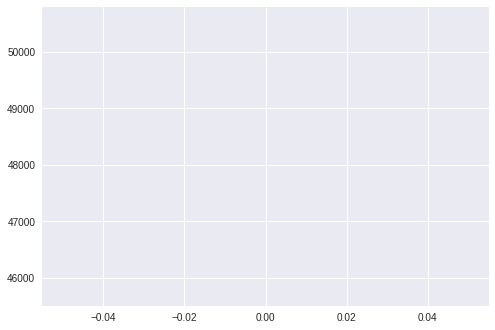

Epoch:  1 Avg. Cost per Chunk 48149.141510009766
Generated text:  e trr  wnd tnn t t biie thes  yot   saatg ri m  iresiree  tie
toit yhe micrphss   mis surn th totn i 



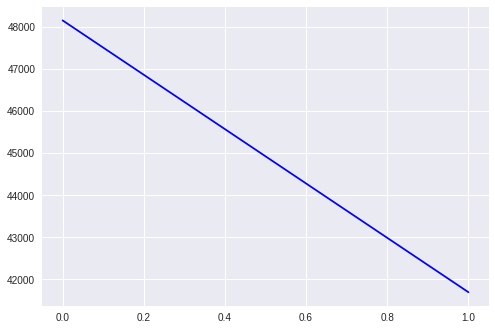

Epoch:  2 Avg. Cost per Chunk 41696.72413635254
Generated text:  euhsikt toar ahifseth snoertstike aeasesden  oome heng ihrd to sacher  c weadd tet sromtsn 
and te s 



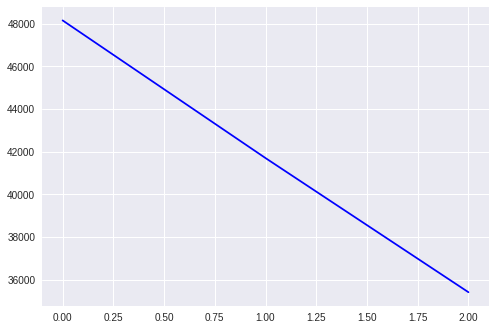

Epoch:  3 Avg. Cost per Chunk 35408.83137130737
Generated text:  u tack n  mp my ctrreo s repole crmtreu
tuene e popgioa an the corh dtincreti ielk ngshe ccit  iomns 



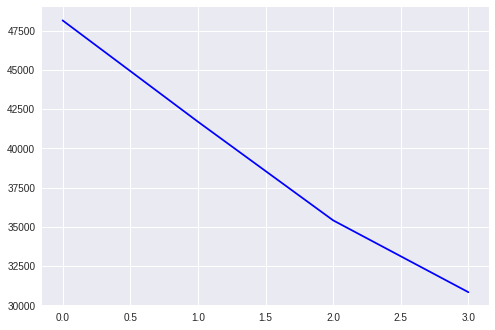

Epoch:  4 Avg. Cost per Chunk 30830.61994934082
Generated text:  tthe roa.'s an the reof  fhyingto  wasch as t d beowk ss
and aedlin prppers  tven crue hheough in he 



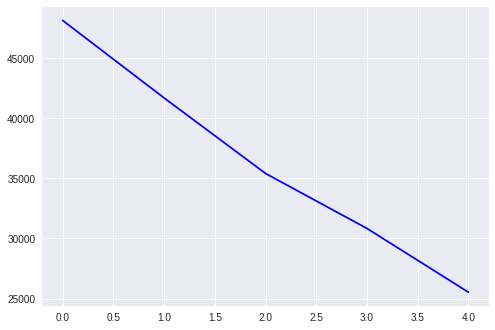

Epoch:  5 Avg. Cost per Chunk 25523.67498397827
Generated text:  teofeersus
 theughtti leke meygerous
cops cauld sust a eest me  blacin us, we re gerd like temtages
 



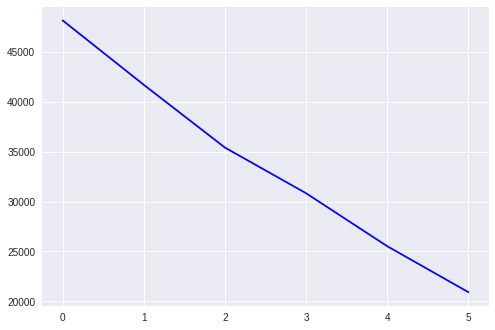

Epoch:  6 Avg. Cost per Chunk 20919.56527709961
Generated text:   ts tol cnd extand o lt from the rrt to calelot
the parkaye,, i ml pake mo ceads foo iii
i seote a m 



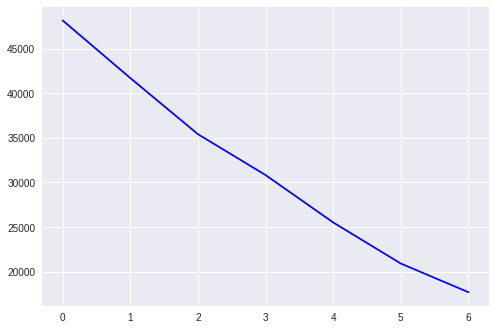

Epoch:  7 Avg. Cost per Chunk 17710.93537044525
Generated text:  hcctrees fike yerrin, then mxtend streng
i drank meet cith fegsrtc iove hea shet und in teal
wrom ah 



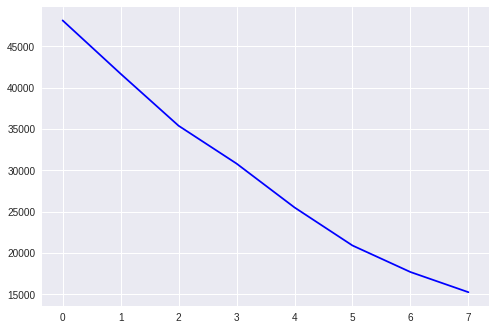

Epoch:  8 Avg. Cost per Chunk 15270.282915115356
Generated text:   otale,ptitches oike h blcee, but iow bosexual, i'm jn mntellect rl
of hap  i'm a meofessional and t 



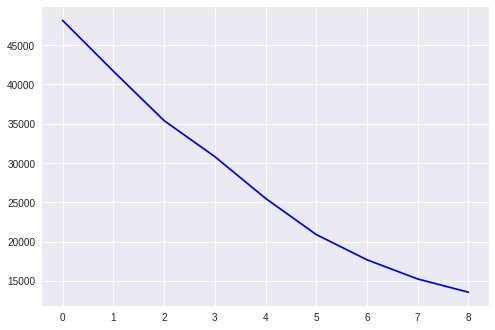

Epoch:  9 Avg. Cost per Chunk 13586.947179794312
Generated text:  ipecause in dlovides us with the caober tn idat th geide us aven dheught sa snow thme ow te sll iott 



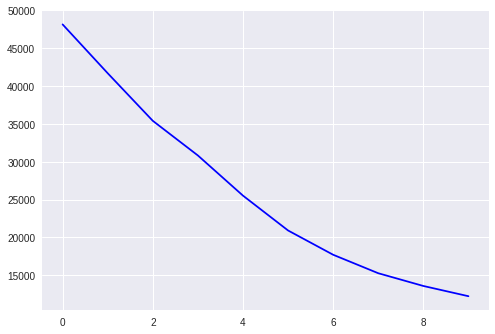

Epoch:  10 Avg. Cost per Chunk 12233.704765319824
Generated text:   trpitcheand then you die;aife's a bitcheand the  you die; that's why we put high
cause iou never kn 



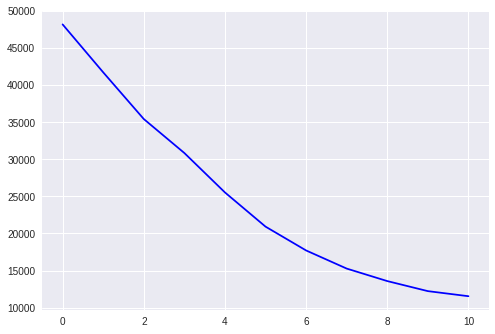

Epoch:  11 Avg. Cost per Chunk 11549.510177612305
Generated text:  n
 ghen i woite yy hand it got
and ixpand alot from the loz to chmelot
the tarlayer, i'll make to he 



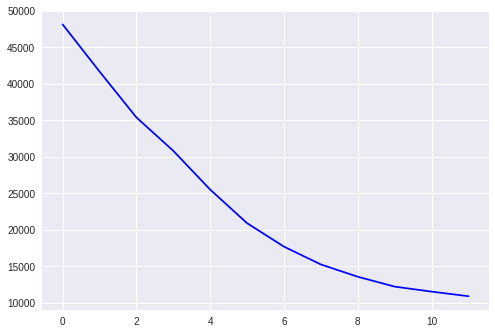

Epoch:  12 Avg. Cost per Chunk 10921.025015830994
Generated text:  ttjuana smokin street dweller
who's always on the corner, rollin up blessed
when i dress, it's never 



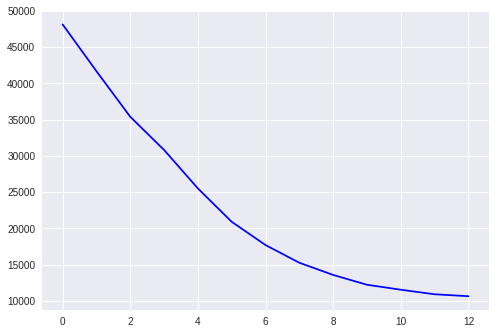

Epoch:  13 Avg. Cost per Chunk 10653.708347320557
Generated text:  nk au im-straul crcles street's disciple, i rock beats that s mega trifle
and groovy but smoother th 



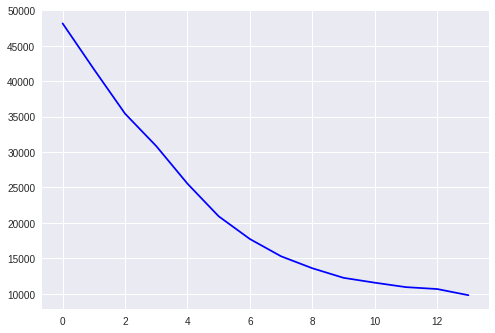

Epoch:  14 Avg. Cost per Chunk 9781.409016609192
Generated text:  kne lhme fosour mond
(dheck ot'uut
then i m ohillin, s'doab fhe muddha  get my lrew to sussbeers
and 



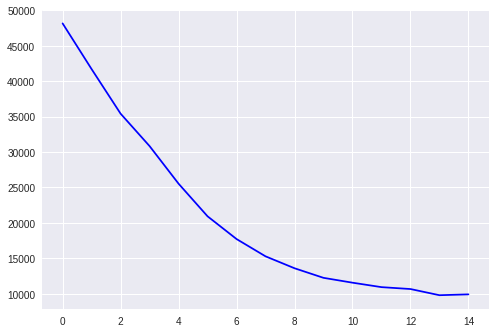

Epoch:  15 Avg. Cost per Chunk 9901.740725040436
Generated text:  nk tou my shit is stuck
tro to couk it, in wouldn't shoot now i'm in danger
finally pulled it back a 



In [30]:
costs = []

def train(epochs):
  for epoch in range(epochs):
    epochcost = 0
    generated = ''
    
    for _ in range(len(X)//chunk_size): #Double slash divides and rounds to integer
      h = myrnn.init_hidden()
      cost = 0
      
      x, y = random_chunk(chunk_size)
      x, y = Variable(x), Variable(y)
      
      for i in range(chunk_size):
        out, h = myrnn.forward(x[i], h)
        cost += criterion(out, y[i])
        predlet = out.data.max(1)[1]
        letter = num_to_let[predlet[0]]
        generated += letter
      
      optimiser.zero_grad()
      cost.backward()
      optimiser.step()
      
      epochcost += cost.data[0]
      
    epochcost /= len(x)//chunk_size #Normalise it by number of sequence
    
    costs.append(epochcost)
    plt.figure()
    plt.plot(costs, 'b')
    plt.show()
    print('Epoch: ', epoch+1, 'Avg. Cost per Chunk', epochcost)
    print('Generated text: ', generated[0:100], '\n')

train(epochs)
    

In [31]:
def generate(prime_str = 'a', str_len = 150, temperature =0.75): #Measure of how random it is
  generated = prime_str
  
  h = myrnn.init_hidden()
  
  prime_str = maparray(prime_str, let_to_num)
  x = Variable(torch.LongTensor(prime_str))
  
  for i in range(len(x)):
    out, h = myrnn.forward(x[i], h )
  x = x[-1]
  
  for i in range(str_len):
    out, h = myrnn.forward(x, h)
    
    out_dist = out.data.view(-1).div(temperature).exp() #Dividing by temperature causes it to become closer together so when exp is applied (kind of normalisation)
    sample = torch.multinomial(out_dist, 1)[0] #Takes in a vector where each number defines how probable it is (not proability but higher it is, more likely) index at 0 because 1x1 tensor
    pred_char = num_to_let[sample]
    
    generated += pred_char
    
    x = Variable(torch.LongTensor([sample]))
    
  return generated
  
gen = generate('this is', 500, 0.2)

print(gen)
    

this is like that
i got it hemmed, now you never get the mic back
when i was a fing at the chip toothed smike play it
cause yeah, we we be pumping oo word
i be sleeping
a two day stay, you may say i needed time alone
to relax my dome, no phone, left the 9 at home
you see two shove oo niggas, they spot (big dove)
we rock shit, ph.d
and my mock who keep my loot back
time is illmatic keep static like wool fabric
pack a four might beat his case, 'til he come home i play it low key
so stay civilised, time f


Looking at it, you can see the model is not perfect and has a long way to go. The cost is *~10^4* which could be minimised further. However, the effects of RNN have been illustrated here and while spending more time will increase the effectiveness of the network, the time would be better used on another project.